In [64]:
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import os
from scipy.spatial.distance import cdist
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from collections import Counter
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [65]:
input_path = 'C:/Users/alexm/OneDrive/Ambiente de Trabalho/ESTUDO/4MASTER/2ºano/IAA/data/iris.data'

# Exercío 1

### 1.1

In [66]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d = np.array([0, 1, 1, 1])

def f(s):
    return 1 if s > 0.5 else 0

### 1.2

In [67]:
np.random.seed(42)
w0 = np.random.uniform(-1, 1)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)

print(f"Pesos iniciais: w0={w0:.4f}, w1={w1:.4f}, w2={w2:.4f}")
o = np.array([f(w0 + w1*x[0] + w2*x[1]) for x in X])
print("Saídas iniciais:", o)

Pesos iniciais: w0=-0.2509, w1=0.9014, w2=0.4640
Saídas iniciais: [0 0 1 1]


### 1.3

In [68]:
e = d - o
print("Erro:", e)

Erro: [0 1 0 0]


### 1.4

In [69]:
alpha = 1e-4
dw0 = dw1 = dw2 = 0
for i in range(4):
    dw0 += alpha * e[i]
    dw1 += alpha * X[i,0] * e[i]
    dw2 += alpha * X[i,1] * e[i]
print(f"Δw0={dw0:.6f}, Δw1={dw1:.6f}, Δw2={dw2:.6f}")

Δw0=0.000100, Δw1=0.000000, Δw2=0.000100


### 1.5

In [70]:
w0 = np.random.uniform(-1, 1)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)

errors = []
weights = []

for epoch in range(20):
    dw0 = dw1 = dw2 = 0
    err = 0
    for i in range(4):
        s = w0 + w1*X[i,0] + w2*X[i,1]
        o = f(s)
        e = d[i] - o
        dw0 += alpha * e
        dw1 += alpha * X[i,0] * e
        dw2 += alpha * X[i,1] * e
        err += abs(e)
    w0 += dw0; w1 += dw1; w2 += dw2
    errors.append(err)
    weights.append([w0, w1, w2])
    print(f"Época {epoch+1:2d} | Erro: {err} | w: [{w0:.3f}, {w1:.3f}, {w2:.3f}]")

Época  1 | Erro: 3 | w: [0.198, -0.688, -0.688]
Época  2 | Erro: 3 | w: [0.198, -0.688, -0.688]
Época  3 | Erro: 3 | w: [0.198, -0.687, -0.687]
Época  4 | Erro: 3 | w: [0.199, -0.687, -0.687]
Época  5 | Erro: 3 | w: [0.199, -0.687, -0.687]
Época  6 | Erro: 3 | w: [0.199, -0.687, -0.687]
Época  7 | Erro: 3 | w: [0.199, -0.687, -0.687]
Época  8 | Erro: 3 | w: [0.200, -0.686, -0.686]
Época  9 | Erro: 3 | w: [0.200, -0.686, -0.686]
Época 10 | Erro: 3 | w: [0.200, -0.686, -0.686]
Época 11 | Erro: 3 | w: [0.201, -0.686, -0.686]
Época 12 | Erro: 3 | w: [0.201, -0.686, -0.686]
Época 13 | Erro: 3 | w: [0.201, -0.685, -0.685]
Época 14 | Erro: 3 | w: [0.202, -0.685, -0.685]
Época 15 | Erro: 3 | w: [0.202, -0.685, -0.685]
Época 16 | Erro: 3 | w: [0.202, -0.685, -0.685]
Época 17 | Erro: 3 | w: [0.202, -0.685, -0.685]
Época 18 | Erro: 3 | w: [0.203, -0.684, -0.684]
Época 19 | Erro: 3 | w: [0.203, -0.684, -0.684]
Época 20 | Erro: 3 | w: [0.203, -0.684, -0.684]


### 1.6 - a)

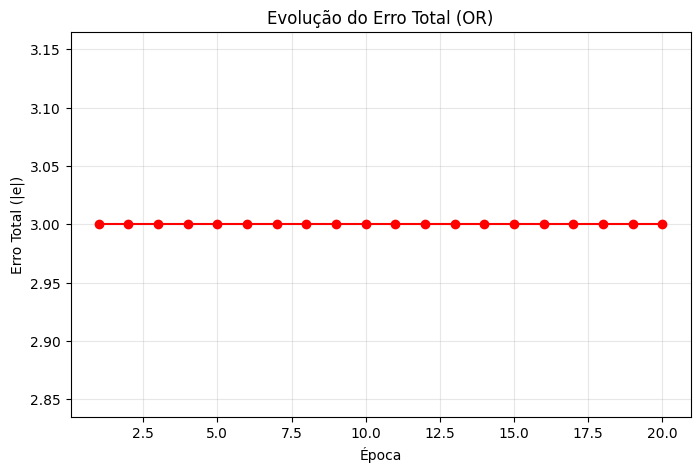

In [71]:
plt.figure(figsize=(8,5))
plt.plot(range(1,21), errors, 'o-', color='red')
plt.title('Evolução do Erro Total (OR)')
plt.xlabel('Época'); plt.ylabel('Erro Total (|e|)')
plt.grid(alpha=0.3); plt.show()

### 1.6 - b)

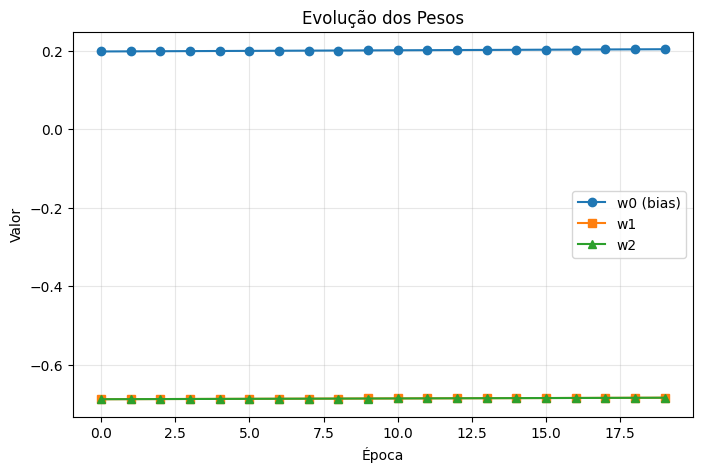

In [72]:
weights = np.array(weights)
plt.figure(figsize=(8,5))
plt.plot(weights[:,0], 'o-', label='w0 (bias)')
plt.plot(weights[:,1], 's-', label='w1')
plt.plot(weights[:,2], '^-', label='w2')
plt.title('Evolução dos Pesos')
plt.xlabel('Época'); plt.ylabel('Valor')
plt.legend(); plt.grid(alpha=0.3); plt.show()

### 1.6 - c)

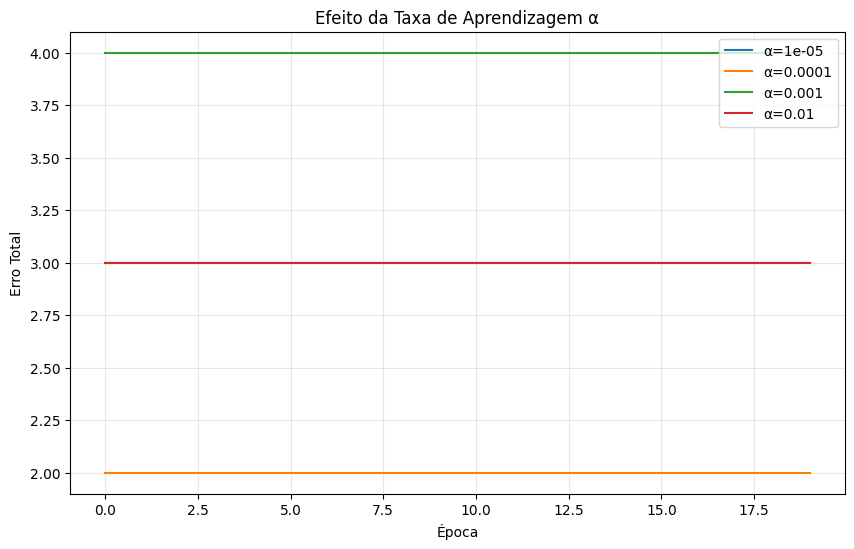

In [73]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2]
plt.figure(figsize=(10,6))
for a in alphas:
    w0 = np.random.uniform(-1,1)
    w1 = np.random.uniform(-1,1)
    w2 = np.random.uniform(-1,1)
    err_list = []
    for _ in range(50):
        dw0=dw1=dw2=0
        for i in range(4):
            s = w0 + w1*X[i,0] + w2*X[i,1]
            o = f(s)
            e = d[i]-o
            dw0 += a*e; dw1 += a*X[i,0]*e; dw2 += a*X[i,1]*e
        w0 += dw0; w1 += dw1; w2 += dw2
        err_list.append(sum(abs(d - np.array([f(w0 + w1*x[0] + w2*x[1]) for x in X]))))
    plt.plot(err_list[:20], label=f'α={a}')
plt.title('Efeito da Taxa de Aprendizagem α')
plt.xlabel('Época'); plt.ylabel('Erro Total')
plt.legend(); plt.grid(alpha=0.3); plt.show()

### 1.6 - d)

In [74]:
runs = 30
epochs_to_conv = []
alpha = 1e-4
max_ep = 1000

for _ in range(runs):
    w0 = np.random.uniform(-1,1)
    w1 = np.random.uniform(-1,1)
    w2 = np.random.uniform(-1,1)
    ep = 0
    while ep < max_ep:
        ep += 1
        dw0 = dw1 = dw2 = 0
        for i in range(4):
            s = w0 + w1*X[i,0] + w2*X[i,1]
            o = f(s)
            e = d[i]-o
            dw0 += alpha*e; dw1 += alpha*X[i,0]*e; dw2 += alpha*X[i,1]*e
        w0 += dw0; w1 += dw1; w2 += dw2
        if sum(abs(d - np.array([f(w0 + w1*x[0] + w2*x[1]) for x in X]))) == 0:
            break
    epochs_to_conv.append(ep)

mean = np.mean(epochs_to_conv)
std = np.std(epochs_to_conv)
print(f"\nMédia de épocas até convergência: {mean:.1f} ± {std:.1f}")


Média de épocas até convergência: 983.4 ± 89.2


### 1.7

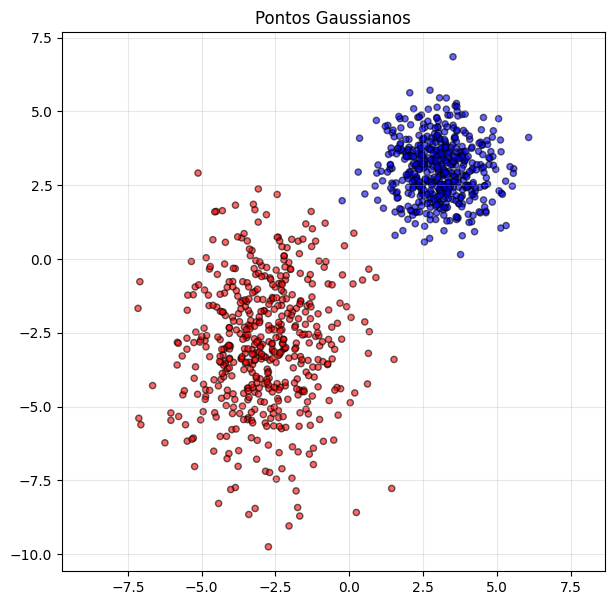

In [75]:
n = 500
a = np.random.multivariate_normal([3,3], [[1,0],[0,1]], n)
b = np.random.multivariate_normal([-3,-3], [[2,0],[0,5]], n)
a = np.column_stack((a, np.zeros(n)))
b = np.column_stack((b, np.ones(n)))
data = np.vstack((a,b))
np.random.shuffle(data)

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='bwr', alpha=0.6, s=20, edgecolor='k')
plt.title('Pontos Gaussianos')
plt.axis('equal'); plt.grid(alpha=0.3); plt.show()

np.savetxt("pontos_gaussianos.csv", data, delimiter=",", header="x1,x2,label", comments='')

### 1.8 - 1.9

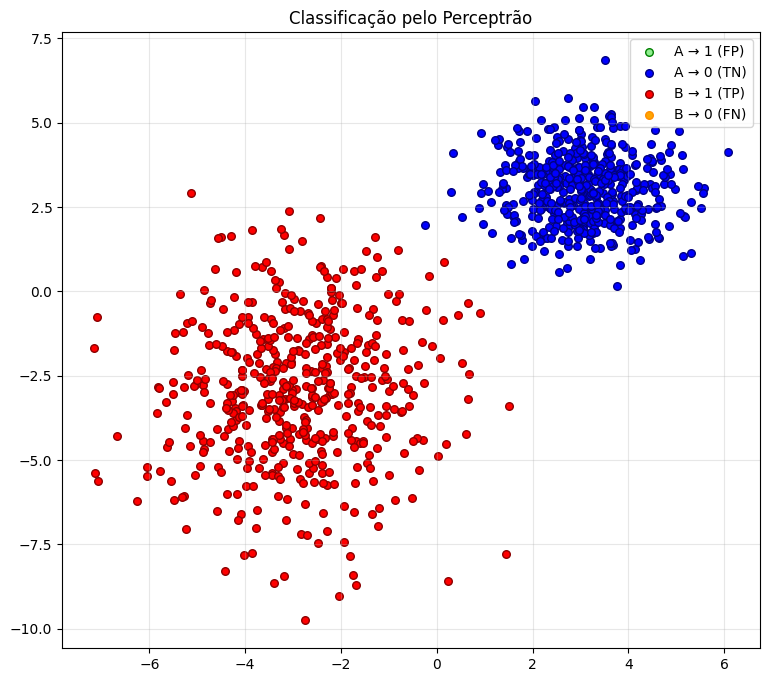

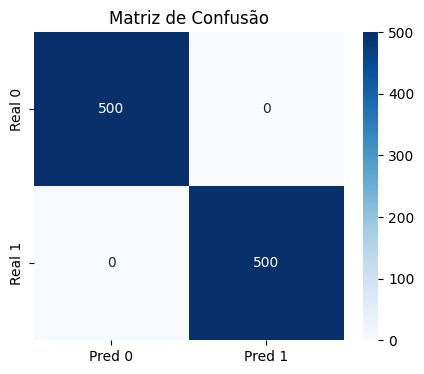

In [76]:
Xg = data[:,:2]; dg = data[:,2].astype(int)

def train_perceptron(X, d, alpha=1e-4, max_ep=300):
    w = np.random.uniform(-1,1,3)
    for _ in range(max_ep):
        dw = np.zeros(3)
        for i in range(len(X)):
            s = w[0] + w[1]*X[i,0] + w[2]*X[i,1]
            o = f(s)
            e = d[i] - o
            dw += alpha * e * np.array([1, X[i,0], X[i,1]])
        w += dw
    return w

w = train_perceptron(Xg, dg)
pred = np.array([f(w[0] + w[1]*x[0] + w[2]*x[1]) for x in Xg])

# Cores
c1 = (dg == 0) & (pred == 1)
c2 = (dg == 0) & (pred == 0)
c3 = (dg == 1) & (pred == 1)
c4 = (dg == 1) & (pred == 0)

plt.figure(figsize=(9,8))
plt.scatter(Xg[c1,0], Xg[c1,1], c='lightgreen', label='A → 1 (FP)', s=30, edgecolor='g')
plt.scatter(Xg[c2,0], Xg[c2,1], c='blue', label='A → 0 (TN)', s=30, edgecolor='navy')
plt.scatter(Xg[c3,0], Xg[c3,1], c='red', label='B → 1 (TP)', s=30, edgecolor='darkred')
plt.scatter(Xg[c4,0], Xg[c4,1], c='orange', label='B → 0 (FN)', s=30, edgecolor='darkorange')
plt.title('Classificação pelo Perceptrão')
plt.legend(); plt.grid(alpha=0.3); plt.show()

cm = confusion_matrix(dg, pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['Real 0','Real 1'])
plt.title('Matriz de Confusão'); plt.show()

### 1.10

In [77]:
metrics = []
for _ in range(30):
    w = train_perceptron(Xg, dg)
    p = np.array([f(w[0] + w[1]*x[0] + w[2]*x[1]) for x in Xg])
    acc = accuracy_score(dg, p)
    prec = precision_score(dg, p)
    rec = recall_score(dg, p)
    f1 = f1_score(dg, p)
    metrics.append([acc, prec, rec, f1])

metrics = np.array(metrics)
print(f"\n{'Métrica':<12} {'Média':<8} {'± Std'}")
print("-" * 35)
for i, name in enumerate(['Acurácia', 'Precisão', 'Recall', 'F1']):
    print(f"{name:<12} {metrics[:,i].mean():.3f}   ± {metrics[:,i].std():.3f}")


Métrica      Média    ± Std
-----------------------------------
Acurácia     0.995   ± 0.003
Precisão     1.000   ± 0.000
Recall       0.989   ± 0.007
F1           0.995   ± 0.003


# Exercío 2

### Análise da Data 

In [78]:
# fetch dataset 
iris = fetch_ucirepo(id=53)   
# data (as pandas dataframes) 

# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [79]:
iris.data.features 

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
iris.data.targets

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [81]:
iris.data.original

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [82]:
iris.data.original.groupby('class').size()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Visualização da Data

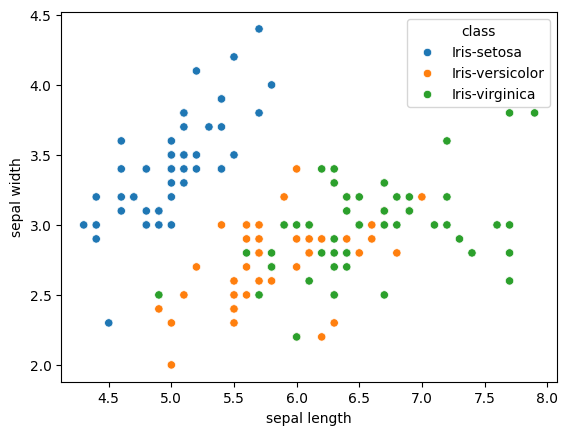

In [83]:
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=iris.data.original)
plt.show()

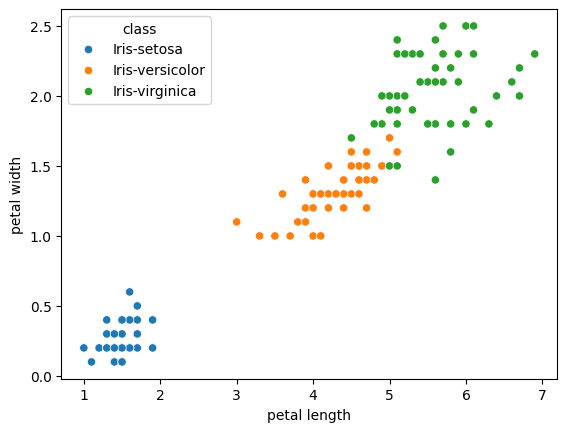

In [84]:
sns.scatterplot(x='petal length', y='petal width', hue='class', data=iris.data.original)
plt.show()

### Preparação da Data

In [85]:
X = iris.data.features 
y = iris.data.targets 

In [86]:
X = iris.data.features.to_numpy()
y = iris.data.targets.to_numpy().ravel()

In [87]:
# encode labels 
# Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
le = LabelEncoder()
y = le.fit_transform(y)

In [88]:
# Splitting dataset into training set and test set

test_size = 0.3
np.random.seed(42)

# Embaralhar índices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Calcular ponto de divisão
split_point = int(len(X) * (1 - test_size))

# Dividir dados
train_idx = indices[:split_point]
test_idx = indices[split_point:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


### KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#### Experimento: KNN com partições aleatórias 70/30

- Repetimos 30 vezes para cada k em {3, 7, 11}
- Em cada repetição: dividimos em treino/teste (70/30) com uma semente aleatória diferente
- Métricas: Accuracy e F1 macro
- Visualização: boxplot com whiskers para comparar distribuições das métricas por k

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)
  and would like to capture the relationship between  x
  and  y
 . More formally, our goal is to learn a function  h:X→Y
  so that given an unseen observation  x
 ,  h(x)
  can confidently predict the corresponding output  y
 .

In [90]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [91]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

### Prediction

In [92]:
k_values = [3, 7, 11]
n_runs = 30
results = {k: [] for k in k_values}

In [93]:
results = {k: [] for k in k_values}

for k in k_values:
    for seed in range(n_runs):
        np.random.seed(seed)
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        split_point = int(len(X) * 0.7)

        train_idx = indices[:split_point]
        test_idx = indices[split_point:]

        # Converter para NumPy
        X_train = X.iloc[train_idx].to_numpy()
        X_test = X.iloc[test_idx].to_numpy()
        y_train = np.array(y)[train_idx]
        y_test = np.array(y)[test_idx]

        # Predições
        predictions = [knn_predict(X_train, y_train, test_point, k) for test_point in X_test]

        # Accuracy manual
        correct = sum(p == t for p, t in zip(predictions, y_test))
        acc = correct / len(y_test)
        results[k].append(acc)

# Boxplot
plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)
plt.title("Comparação de Accuracy para diferentes valores de k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'


Matriz de confusão para k = 3:
[[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]


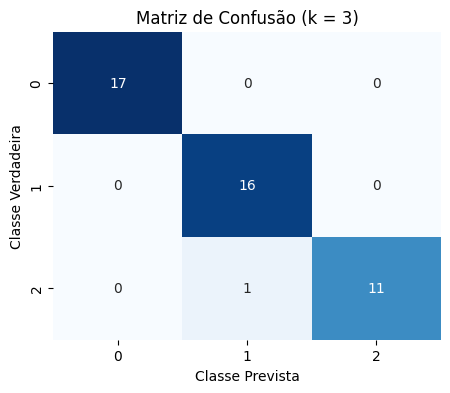


Matriz de confusão para k = 7:
[[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]


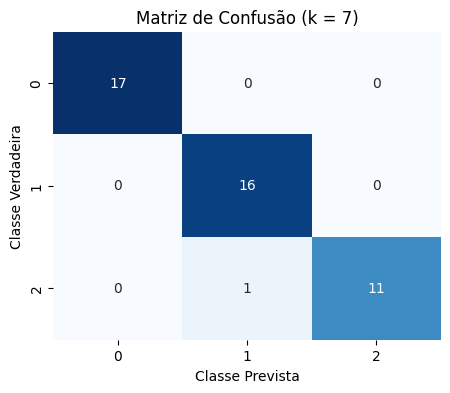


Matriz de confusão para k = 11:
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


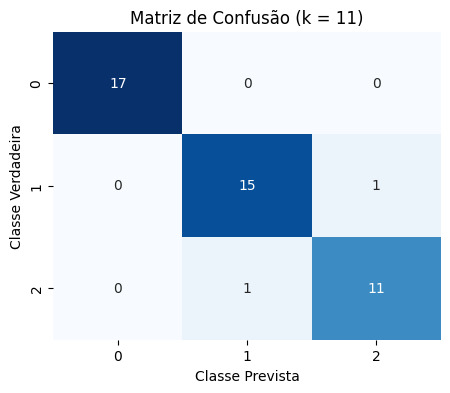

C:\Users\alexm\AppData\Local\Temp\ipykernel_11044\1914038532.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)


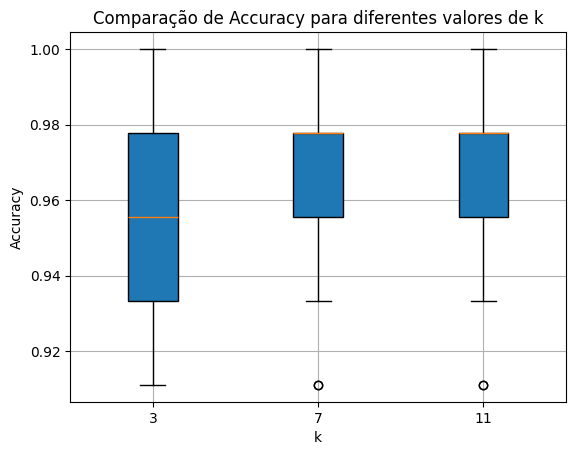

In [ ]:
for k in k_values:
    for seed in range(n_runs):
        np.random.seed(seed)
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        split_point = int(len(X) * 0.7)

        train_idx = indices[:split_point]
        test_idx = indices[split_point:]

        # Converter para NumPy
        X_train = X.iloc[train_idx].to_numpy()
        X_test = X.iloc[test_idx].to_numpy()
        y_train = np.array(y)[train_idx]
        y_test = np.array(y)[test_idx]

        # Predições
        predictions = [knn_predict(X_train, y_train, test_point, k) for test_point in X_test]

        # Accuracy manual
        correct = sum(p == t for p, t in zip(predictions, y_test))
        acc = correct / len(y_test)
        results[k].append(acc)

    # --- Cálculo manual da matriz de confusão (para o último seed) ---
    classes = np.unique(np.concatenate((y_test, predictions)))
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)

    for true, pred in zip(y_test, predictions):
        i = np.where(classes == true)[0][0]
        j = np.where(classes == pred)[0][0]
        cm[i, j] += 1

    # --- Mostrar matriz de confusão ---
    print(f"\nMatriz de confusão para k = {k}:\n{cm}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(f"Matriz de Confusão (k = {k})")
    plt.xlabel("Classe Prevista")
    plt.ylabel("Classe Verdadeira")
    plt.show()

# --- Boxplot final de comparação ---
plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)
plt.title("Comparação de Accuracy para diferentes valores de k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_knn_decision(X_train, y_train, test_point, k):
    # Converter para arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    test_point = np.array(test_point)

    # Calcular distâncias
    distances = [np.sqrt(np.sum((x - test_point)**2)) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]

    # Vizinhos mais próximos
    nearest_points = X_train[nearest_indices]
    nearest_labels = y_train[nearest_indices]

    # Previsão
    predicted_label = Counter(nearest_labels).most_common(1)[0][0]

    # --- Plot ---
    plt.figure(figsize=(7, 6))

    # Plot dos pontos de treino
    for label in np.unique(y_train):
        plt.scatter(X_train[y_train == label, 0],
                    X_train[y_train == label, 1],
                    label=f"Classe {label}", alpha=0.6)

    # Plot do ponto de teste
    plt.scatter(test_point[0], test_point[1], c='black', s=120, marker='X', label='Ponto de Teste')

    # Destacar vizinhos
    plt.scatter(nearest_points[:, 0], nearest_points[:, 1],
                s=150, edgecolors='red', facecolors='none', linewidths=2,
                label=f'{k} vizinhos mais próximos')

    # Linhas de ligação
    for neighbor in nearest_points:
        plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]],
                 'r--', alpha=0.5)

    plt.title(f"Exemplo de previsão KNN (k={k})\nClasse prevista: {predicted_label}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Ponto de teste: {test_point}")
    print(f"Vizinhos escolhidos (k={k}): {nearest_points}")
    print(f"Labels dos vizinhos: {nearest_labels}")
    print(f"Classe prevista: {predicted_label}")


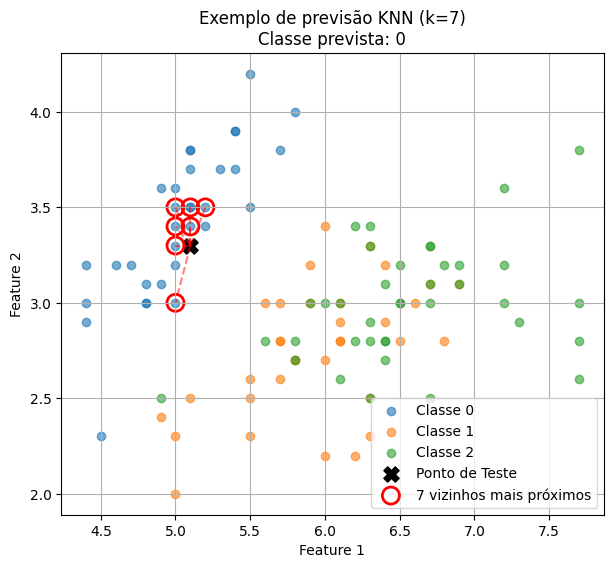

Ponto de teste: [5.1 3.3 1.7 0.5]
Vizinhos escolhidos (k=7): [[5.  3.5 1.6 0.6]
 [5.1 3.4 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [5.2 3.5 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [5.  3.  1.6 0.2]]
Labels dos vizinhos: [0 0 0 0 0 0 0]
Classe prevista: 0


In [ ]:
idx = 20
test_point = X_test[idx]

plot_knn_decision(X_train, y_train, test_point, k=7)

Com K par: Se houver apenas duas classes (classificação binária), é possível que o número de vizinhos pertencentes a cada classe seja exatamente igual (exemplo: $K=4$, 2 vizinhos da Classe A e 2 vizinhos da Classe B). Isso resulta em um empate, e o algoritmo não consegue decidir a classe sem regras de desempate adicionais, o que complica a implementação e a interpretação.

Com K ímpar: Ao usar um $K$ ímpar, o empate é impossível em problemas de classificação binária (duas classes), pois uma classe sempre terá pelo menos um voto a mais que a outra, garantindo uma maioria.

## Exercício 3

In [94]:
X = pd.DataFrame(X, columns=iris.data.features.columns)

In [95]:
def discretize_column(col):
    low, high = np.percentile(col, [33, 66])
    categories = []
    for val in col:
        if val <= low:
            categories.append("low")
        elif val <= high:
            categories.append("medium")
        else:
            categories.append("high")
    return categories

X_disc = X.apply(discretize_column)

### Naive Bayes (versão categórica)

In [96]:
class NaiveBayesCategorical:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.likelihoods = {}
        
        for c in self.classes:
            subset = X[y == c]
            self.likelihoods[c] = {}
            for col in X.columns:
                value_counts = subset[col].value_counts(normalize=True)
                self.likelihoods[c][col] = value_counts.to_dict()
    
    def predict_one(self, x):
        probs = {}
        for c in self.classes:
            prob = np.log(self.priors[c])
            for col, val in x.items():
                prob += np.log(self.likelihoods[c][col].get(val, 1e-6))  # suavização
            probs[c] = prob
        return max(probs, key=probs.get)
    
    def predict(self, X):
        return np.array([self.predict_one(row) for _, row in X.iterrows()])

### Avaliação com 30 partições aleatórias (70%/30%)

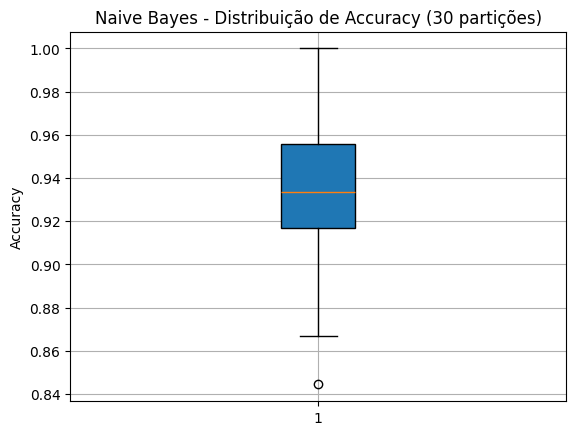

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Discretização (mantém igual) ---
def discretize_column(col):
    low, high = np.percentile(col, [33, 66])
    categories = []
    for val in col:
        if val <= low:
            categories.append("low")
        elif val <= high:
            categories.append("medium")
        else:
            categories.append("high")
    return categories

X = pd.DataFrame(X, columns=iris.data.features.columns)
X_disc = X.apply(discretize_column)

# --- Classe Naive Bayes categórico (igual ao teu código) ---
class NaiveBayesCategorical:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.likelihoods = {}
        
        for c in self.classes:
            subset = X[y == c]
            self.likelihoods[c] = {}
            for col in X.columns:
                value_counts = subset[col].value_counts(normalize=True)
                self.likelihoods[c][col] = value_counts.to_dict()
    
    def predict_one(self, x):
        probs = {}
        for c in self.classes:
            prob = np.log(self.priors[c])
            for col, val in x.items():
                prob += np.log(self.likelihoods[c][col].get(val, 1e-6))  # suavização
            probs[c] = prob
        return max(probs, key=probs.get)
    
    def predict(self, X):
        return np.array([self.predict_one(row) for _, row in X.iterrows()])

# --- Avaliação manual (sem sklearn) ---
n_runs = 30
accuracies = []

for seed in range(n_runs):
    np.random.seed(seed)
    indices = np.arange(len(X_disc))
    np.random.shuffle(indices)

    split_point = int(len(X_disc) * 0.7)
    train_idx = indices[:split_point]
    test_idx = indices[split_point:]

    X_train = X_disc.iloc[train_idx]
    X_test = X_disc.iloc[test_idx]
    y_train = np.array(y)[train_idx]
    y_test = np.array(y)[test_idx]

    # Treinar e prever
    nb = NaiveBayesCategorical()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)

    # Calcular accuracy manualmente
    correct = sum(p == t for p, t in zip(y_pred, y_test))
    acc = correct / len(y_test)
    accuracies.append(acc)

# --- Boxplot dos resultados ---
plt.boxplot(accuracies, patch_artist=True)
plt.title("Naive Bayes - Distribuição de Accuracy (30 partições)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### Matriz de confusão

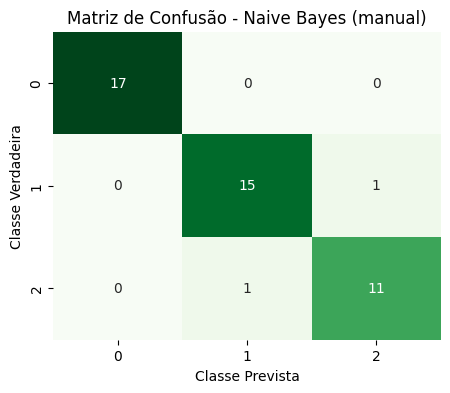

In [98]:
classes = np.unique(np.concatenate((y_test, y_pred)))
n_classes = len(classes)
cm = np.zeros((n_classes, n_classes), dtype=int)

for true, pred in zip(y_test, y_pred):
    i = np.where(classes == true)[0][0]
    j = np.where(classes == pred)[0][0]
    cm[i, j] += 1

# --- Plot da matriz ---
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - Naive Bayes (manual)")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

O k-NN consegue capturar melhor as fronteiras entre classes contínuas, como as medidas de pétalas e sépalas no dataset Iris.

O Naive Bayes, ao assumir independência entre features e ao discretizar as variáveis, perde alguma informação de precisão.

Contudo, o Naive Bayes é muito mais rápido e mais simples, sendo adequado para conjuntos de dados grandes ou de natureza simbólica.

Conclusão

Em termos de precisão, o k-NN supera o Naive Bayes no conjunto Iris,
mas o Naive Bayes é mais eficiente computacionalmente e mais fácil de interpretar.
Assim, a escolha depende do tipo de dados e da importância relativa entre velocidade e exatidão.

Classes encontradas em y:
['setosa' 'versicolor' 'virginica']

Resumo do alvo binário:
p-    100
p+     50
Name: count, dtype: int64

=== Entropias (alvo p+=Iris-setosa, p-=resto) ===
Conjunto completo S: H(S) = 0.9183
S_low   : H = 0.5700
S_medium: H = 0.4889
S_high  : H = -0.0000

Ganho de informação pela feature 'sepal length (cm)': gain(S,a) = 0.5675

=== Ganho de informação por feature (low/medium/high) ===
petal length (cm): 0.9183
petal width (cm): 0.9183
sepal length (cm): 0.5675
sepal width (cm): 0.3169

→ Maior ganho: 'petal length (cm)'

Matriz de confusão da stump (1 nível) usando a melhor feature:
               Prevista p+  Prevista p-
Verdadeira p+           50            0
Verdadeira p-            0          100


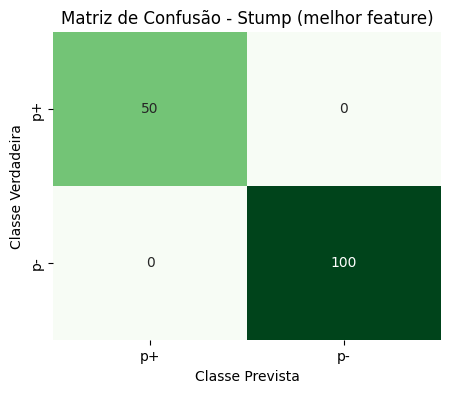

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Funções auxiliares =========
def entropy(labels):
    """Entropia de um vetor 1D de rótulos (strings ou 0/1)."""
    labels = np.asarray(labels)
    if labels.size == 0:
        return 0.0
    _, counts = np.unique(labels, return_counts=True)
    p = counts / counts.sum()
    p = p[p > 0]
    return -(p * np.log2(p)).sum()

def discretize_series(s):
    """Discretização em tercis: low / medium / high."""
    low, high = np.percentile(s, [33, 66])
    out = pd.Series(index=s.index, dtype="object")
    out[s <= low] = "low"
    out[(s > low) & (s <= high)] = "medium"
    out[s > high] = "high"
    return out

def info_gain_S_by_feature(S_labels, feature_cat):
    """Cálculo do ganho de informação da partição."""
    H_S = entropy(S_labels)
    total = len(S_labels)
    cond_entropy = 0.0
    for v, idx in feature_cat.groupby(feature_cat).groups.items():
        Sv = S_labels.iloc[idx]
        cond_entropy += (len(Sv) / total) * entropy(Sv)
    return H_S - cond_entropy, H_S

# ========= Verificação e preparação do alvo =========
print("Classes encontradas em y:")
print(np.unique(y))

# Criar alvo binário (Iris-setosa = positivo)
y_series = pd.Series(y).astype(str)
y_bin = pd.Series(
    np.where(y_series.str.lower().str.contains("setosa"), "p+", "p-"),
    index=y_series.index
)

print("\nResumo do alvo binário:")
print(y_bin.value_counts())

# ========= Discretização e entropias =========
col0_name = X.columns[0]
col0_disc = discretize_series(X[col0_name])

# Entropia total
H_S = entropy(y_bin)

# Entropia por subgrupo (low, medium, high)
entropias_sub = {}
for v in ["low", "medium", "high"]:
    idx = col0_disc[col0_disc == v].index
    entropias_sub[v] = entropy(y_bin.loc[idx])

print("\n=== Entropias (alvo p+=Iris-setosa, p-=resto) ===")
print(f"Conjunto completo S: H(S) = {H_S:.4f}")
for v in ["low", "medium", "high"]:
    print(f"S_{v:<6}: H = {entropias_sub[v]:.4f}")

# ========= Ganho de informação da primeira coluna =========
gain_col0, _ = info_gain_S_by_feature(y_bin, col0_disc)
print(f"\nGanho de informação pela feature '{col0_name}': gain(S,a) = {gain_col0:.4f}")

# ========= Ganho de informação para todas as features =========
gains = {}
for c in X.columns:
    cat = discretize_series(X[c])
    gain_c, _ = info_gain_S_by_feature(y_bin, cat)
    gains[c] = gain_c

print("\n=== Ganho de informação por feature (low/medium/high) ===")
for c, g in sorted(gains.items(), key=lambda x: -x[1]):
    print(f"{c}: {g:.4f}")

best_feature = max(gains, key=gains.get)
print(f"\n→ Maior ganho: '{best_feature}'")

# ========= Matriz de confusão para a stump (1 nível) =========
def majority_by_bucket(y_labels, feature_cat):
    pred_map = {}
    for v, idx in feature_cat.groupby(feature_cat).groups.items():
        yv = y_labels.iloc[idx]
        pred_map[v] = yv.value_counts().idxmax()  # p+ ou p-
    return pred_map

best_cat = discretize_series(X[best_feature])
pred_map = majority_by_bucket(y_bin, best_cat)
y_pred_stump = best_cat.map(pred_map)

classes = ["p+", "p-"]
cm = np.zeros((2, 2), dtype=int)
for t, p in zip(y_bin, y_pred_stump):
    i = classes.index(t)
    j = classes.index(p)
    cm[i, j] += 1

print("\nMatriz de confusão da stump (1 nível) usando a melhor feature:")
print(pd.DataFrame(cm, index=[f"Verdadeira {c}" for c in classes],
                      columns=[f"Prevista {c}" for c in classes]))

# ========= Plot opcional =========
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusão - Stump (melhor feature)")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()


In [102]:
import numpy as np
import pandas as pd

# --- Funções auxiliares (iguais às anteriores) ---
def entropy(labels):
    labels = np.asarray(labels)
    if labels.size == 0:
        return 0.0
    _, counts = np.unique(labels, return_counts=True)
    p = counts / counts.sum()
    p = p[p > 0]
    return -(p * np.log2(p)).sum()

def discretize_series(s):
    low, high = np.percentile(s, [33, 66])
    out = pd.Series(index=s.index, dtype="object")
    out[s <= low] = "low"
    out[(s > low) & (s <= high)] = "medium"
    out[s > high] = "high"
    return out

def info_gain_S_by_feature(S_labels, feature_cat):
    H_S = entropy(S_labels)
    total = len(S_labels)
    cond_entropy = 0.0
    for v, idx in feature_cat.groupby(feature_cat).groups.items():
        Sv = S_labels.iloc[idx]
        cond_entropy += (len(Sv) / total) * entropy(Sv)
    return H_S - cond_entropy


# --- Função principal para construir a árvore (recursiva) ---
def build_tree(X, y, depth=0, max_depth=3):
    # Condições de paragem
    if entropy(y) == 0 or len(X.columns) == 0 or depth >= max_depth:
        return y.value_counts().idxmax()

    # Escolher melhor feature
    gains = {}
    for c in X.columns:
        cat = discretize_series(X[c])
        gain_c = info_gain_S_by_feature(y, cat)
        gains[c] = gain_c

    best_feature = max(gains, key=gains.get)

    # Criar nós filhos
    tree = {best_feature: {}}
    feature_disc = discretize_series(X[best_feature])
    for value in ["low", "medium", "high"]:
        idx = feature_disc[feature_disc == value].index
        if len(idx) == 0:
            tree[best_feature][value] = y.value_counts().idxmax()
        else:
            subtree = build_tree(X.loc[idx, X.columns != best_feature],
                                 y.loc[idx],
                                 depth + 1,
                                 max_depth)
            tree[best_feature][value] = subtree
    return tree


# --- Construir árvore ---
tree = build_tree(X, y_bin, max_depth=3)
print("\n=== Árvore de Decisão (ID3 manual) ===")
import pprint
pprint.pprint(tree, width=80)



=== Árvore de Decisão (ID3 manual) ===
{'petal length (cm)': {'high': 'p-', 'low': 'p+', 'medium': 'p-'}}
